In [1]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


import json
import csv
import pandas as pd
import numpy as np

import networkx as nx

%matplotlib inline

In [2]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file into a DataFrame
with open('../data/out/filtered_tweets_3.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)  # Transpose to set tweets as rows

df


,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,geo
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,[1610294585242300416],"{'annotations': [{'end': 6, 'normalized_text':...",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864...",New ABB E-mobility home charging solution help...,abbgroupnews,NaN
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,[1612750467859378178],"{'annotations': [{'end': 2, 'normalized_text':...",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887...",ABB #technology to facilitate #energyefficienc...,abbgroupnews,NaN
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,[1613113765595320321],"{'annotations': [{'end': 51, 'normalized_text'...",1613113765595320321,en,"{'bookmark_count': 0, 'impression_count': 2559...",Better decisions for a greener data center! Ho...,abbgroupnews,NaN
3,{'media_keys': ['3_1613462741569736704']},51801586,2023-01-12T09:09:45.000Z,[1613463229665271809],"{'annotations': [{'end': 19, 'normalized_text'...",1613463229665271809,en,"{'bookmark_count': 0, 'impression_count': 2087...",ABB Formula E Season 9 goes green in Mexico!\n...,abbgroupnews,NaN
4,{'media_keys': ['13_1613831618141261825']},51801586,2023-01-13T09:41:43.000Z,[1613833662625353729],"{'annotations': [{'end': 7, 'normalized_text':...",1613833662625353729,en,"{'bookmark_count': 0, 'impression_count': 1975...",The #ABB Decoded #podcast with Frank Muehlon i...,abbgroupnews,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10557,NaN,342772500,2023-12-27T11:27:46.000Z,[1739971327153299697],"{'annotations': [{'end': 44, 'normalized_text'...",1739971327153299697,en,"{'bookmark_count': 0, 'impression_count': 65, ...","@ceguvite We are sorry to hear this, Cristian,...",volvocars,NaN
10558,NaN,342772500,2023-12-27T12:30:13.000Z,[1739987045462798635],"{'annotations': [{'end': 42, 'normalized_text'...",1739987045462798635,en,"{'bookmark_count': 0, 'impression_count': 56, ...","@russ_nicol We are sorry to hear this, Russ, p...",volvocars,NaN
10559,NaN,342772500,2023-12-27T12:30:40.000Z,[1739987156708258246],"{'annotations': [{'end': 138, 'normalized_text...",1739987156708258246,en,"{'bookmark_count': 0, 'impression_count': 59, ...","@guydebromhead We are sorry to hear this, plea...",volvocars,NaN
10560,NaN,342772500,2023-12-27T14:15:56.000Z,[1740013648133673208],"{'annotations': [{'end': 115, 'normalized_text...",1740013648133673208,en,"{'bookmark_count': 0, 'impression_count': 58, ...",@cpbattersby Hi there we are sorry to hear thi...,volvocars,NaN


In [4]:
len(df)

10562

In [8]:
from tqdm.notebook import tqdm

with tqdm(total=len(df)) as pbar:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        attachments = row['attachments']
        if type(attachments) == dict:
            for key, value in attachments.items():
                # Check if column with key name already exists
                if key in df.columns:
                    # Update existing column value
                    df.at[index, f'attachments_{key}'] = value
                else:
                    # Create new column and fill with NaN
                    df[f'attachments_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])
        entities = row['entities']
        if type(entities) == dict:
            for key, value in entities.items():
                if key in df.columns:
                    # Update existing column value
                    df.at[index, f'entities_{key}'] = value
                else:
                    # Create new column and fill with NaN
                    df[f'entities_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])
        public_metrics = row['public_metrics']
        if type(public_metrics) == dict:
            for key, value in public_metrics.items():
                if key in df.columns:
                    # Update existing column value
                    df.at[index, f'public_metrics_{key}'] = value
                else:
                    # Create new column and fill with NaN
                    df[f'public_metrics_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])   
        pbar.update(1)  

  0%|          | 0/10562 [00:00<?, ?it/s]

In [9]:
with tqdm(total=len(df)) as pbar:
    for index, row in df.iterrows():
        annotations = row['entities_annotations']
        if annotations:
            for d in annotations:
                for key, value in d.items():
                    # Check if column with key name already exists
                    if key in df.columns:
                        # Update existing column value
                        df.at[index, f'annotations_{key}'] = value
                    else:
                        # Create new column and fill with NaN
                        df[f'annotations_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])
        pbar.update(1)

  0%|          | 0/10562 [00:00<?, ?it/s]

In [10]:
with tqdm(total=len(df)) as pbar:
    for index, row in df.iterrows():
        annotations = row['entities_urls']
        if annotations:
            for d in annotations:
                for key, value in d.items():
                    # Check if column with key name already exists
                    if key in df.columns:
                        # Update existing column value
                        df.at[index, f'urls_{key}'] = value
                    else:
                        # Create new column and fill with NaN
                        df[f'urls_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])
        pbar.update(1)

  0%|          | 0/10562 [00:00<?, ?it/s]

In [11]:
min(df.created_at)

'2023-01-01T09:00:07.000Z'

In [12]:
max(df.created_at)

'2023-12-31T17:15:28.000Z'

In [13]:
len(df)

10562

In [18]:
len(df.author_id.unique())

40

In [19]:
print(df.username.unique())

['abbgroupnews' 'acciona' 'akzonobel' 'alstom' 'arup' 'astrazeneca'
 'btgroup' 'centricaplc' 'danfoss' 'danone' 'deutschepostdhl'
 'dsmfirmenich' 'ecocem' 'edfofficiel' 'edprenewables' 'enelenergia'
 'eonenergyuk' 'gsk' 'heineken' 'hm' 'iberdrola_en' 'ikea'
 'johnsoncontrols' 'leaseplan' 'lego_group' 'maersk' 'moethennessy'
 'nestle' 'novonordisk' 'orsted' 'philips' 'rockwoolgroup' 'sap'
 'schneiderelec' 'sse' 'storaenso' 'unilever' 'verbundag' 'vestas'
 'volvocars']


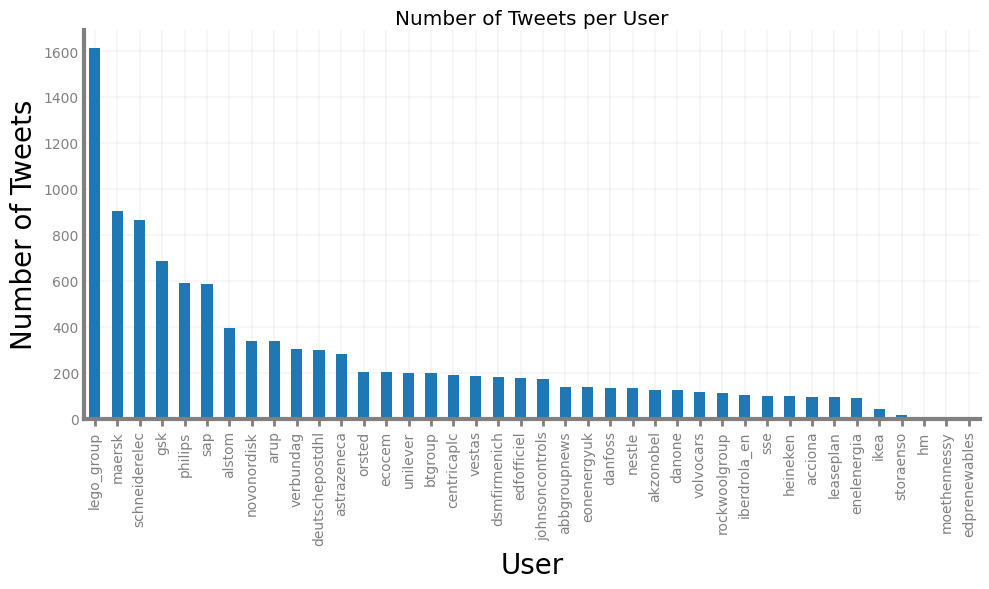

username
lego_group         1613
maersk              902
schneiderelec       866
gsk                 688
philips             590
sap                 587
alstom              393
novonordisk         339
arup                339
verbundag           302
deutschepostdhl     300
astrazeneca         280
orsted              203
ecocem              201
unilever            200
btgroup             198
centricaplc         188
vestas              187
dsmfirmenich        179
edfofficiel         178
johnsoncontrols     174
abbgroupnews        138
eonenergyuk         137
danfoss             133
nestle              132
akzonobel           125
danone              122
volvocars           116
rockwoolgroup       109
iberdrola_en        101
sse                 100
heineken            100
acciona              95
leaseplan            94
enelenergia          88
ikea                 41
storaenso            15
hm                    7
moethennessy          1
edprenewables         1
Name: count, dtype: int64


In [21]:
# Compute the number of total tweets per username/user_id
tweet_counts = df['username'].value_counts()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='bar', color='tab:blue')
plt.title('Number of Tweets per User')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(tweet_counts)

In [22]:
df['created_at']

0        2023-01-03T15:18:41.000Z
1        2023-01-10T09:57:29.000Z
2        2023-01-11T10:01:06.000Z
3        2023-01-12T09:09:45.000Z
4        2023-01-13T09:41:43.000Z
                   ...           
10557    2023-12-27T11:27:46.000Z
10558    2023-12-27T12:30:13.000Z
10559    2023-12-27T12:30:40.000Z
10560    2023-12-27T14:15:56.000Z
10561    2023-12-29T09:47:16.000Z
Name: created_at, Length: 10562, dtype: object

In [23]:
df['date'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [24]:
# 2. Number of tweets per day/week/month
df['created_at'] = pd.to_datetime(df['created_at'])
daily_tweet_counts = df.groupby(df['created_at'].dt.date).size()
weekly_tweet_counts = df.groupby(df['created_at'].dt.isocalendar().week).size()
monthly_tweet_counts = df.groupby(df['created_at'].dt.month).size()

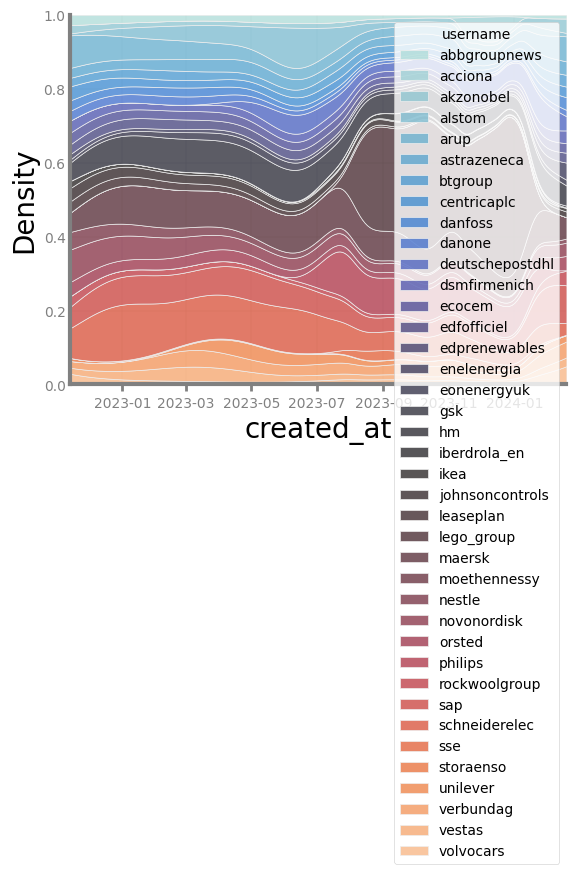

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("icefire", n_colors=len(df.username.unique()))
g = sns.kdeplot(data=df.loc[df.username != 'heineken'], x="created_at", hue="username", multiple="fill", legend=True)

In [ ]:
weekly_tweet_counts = df.groupby(df['created_at'].dt.isocalendar().week).size()

# Reset index to make 'week' and 'username' as columns
weekly_tweet_counts_df = weekly_tweet_counts.reset_index()
weekly_tweet_counts_df = weekly_tweet_counts_df.rename(columns={0: 'count'})

# Plot using Seaborn
plt.figure(figsize=(12, 6))
plt.bar(x = weekly_tweet_counts_df['week'], height = weekly_tweet_counts_df['count'])
plt.title('Number of Tweets Each Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#number of tweets timeseries
# sns.set_palette("icefire", n_colors = len(df.username.unique()))
ax = sns.histplot(data=df, x="created_at", bins=50, kde=True)
plt.xlabel("Date")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
